ForGroup : 26194
GroupGal : 83093
StellarMasses : 114685
EnvMeasures : 67996
visualMorph : 38795
Join GroupGal & StellarMasses 43463
GroupGal & StellarMasses
['CATAID', 'RA', 'Dec', 'Z_1', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE_1', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'Z_2', 'nQ', 'SURVEY_CODE_2', 'SURVEY_CLASS', 'Z_TONRY', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot

<Figure size 3000x1800 with 0 Axes>

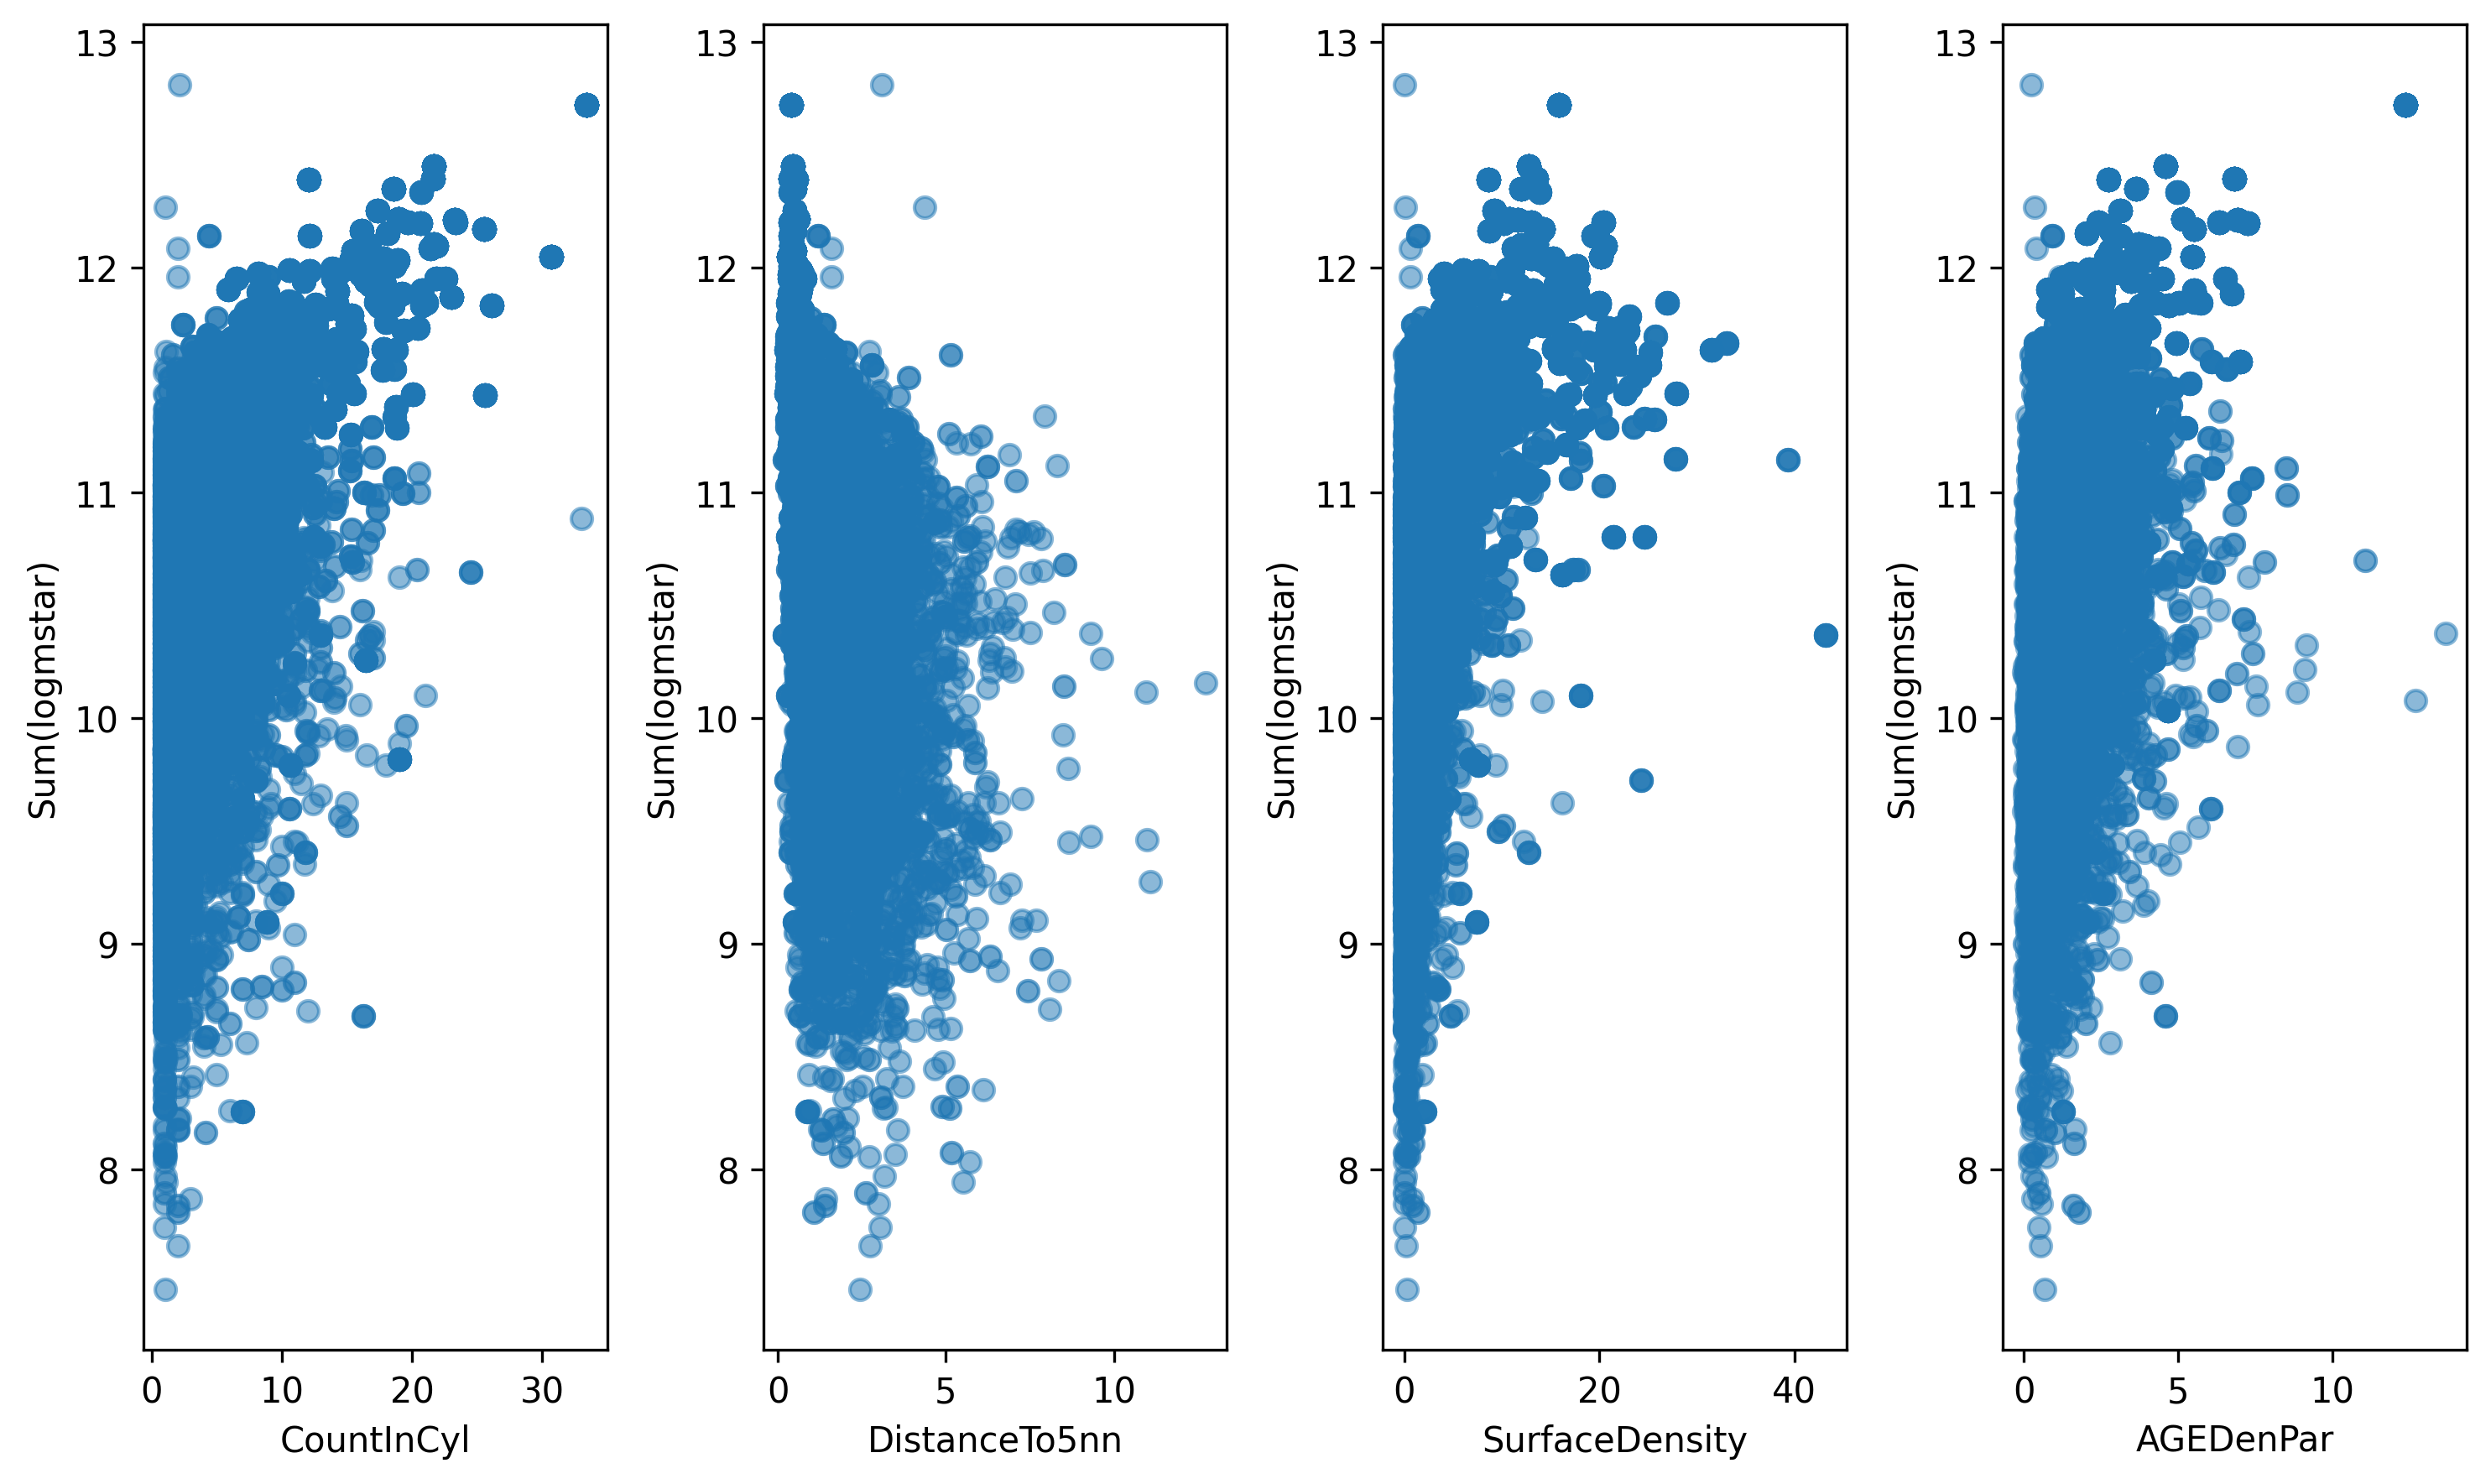

7.466585162996491
12.80964917094016
Pearson Correlation x: CountInCyl y: logmstar Correlation : 0.6620615879237794 T-Test : 0.0
Spearman Correlation x: CountInCyl y: logmstar Correlation : 0.679843265591432 T-Test : 0.0
Linear Regresion x: CountInCyl y: logmstar slope : 0.08519959474294617 Intercept 10.265484937177625 Correlation 0.6620615879237788 Wald test 0.0 0.0006311714280279019
Pearson Correlation x: DistanceTo5nn y: logmstar Correlation : -0.4948305310397911 T-Test : 0.0
Spearman Correlation x: DistanceTo5nn y: logmstar Correlation : -0.6470797922084123 T-Test : 0.0
Linear Regresion x: DistanceTo5nn y: logmstar slope : -0.3646206358885048 Intercept 11.354918190148993 Correlation -0.4948305310397912 Wald test 0.0 0.004190493208138922
Pearson Correlation x: SurfaceDensity y: logmstar Correlation : 0.6088408967923254 T-Test : 0.0
Spearman Correlation x: SurfaceDensity y: logmstar Correlation : 0.6712680150791511 T-Test : 0.0
Linear Regresion x: SurfaceDensity y: logmstar slope : 0.

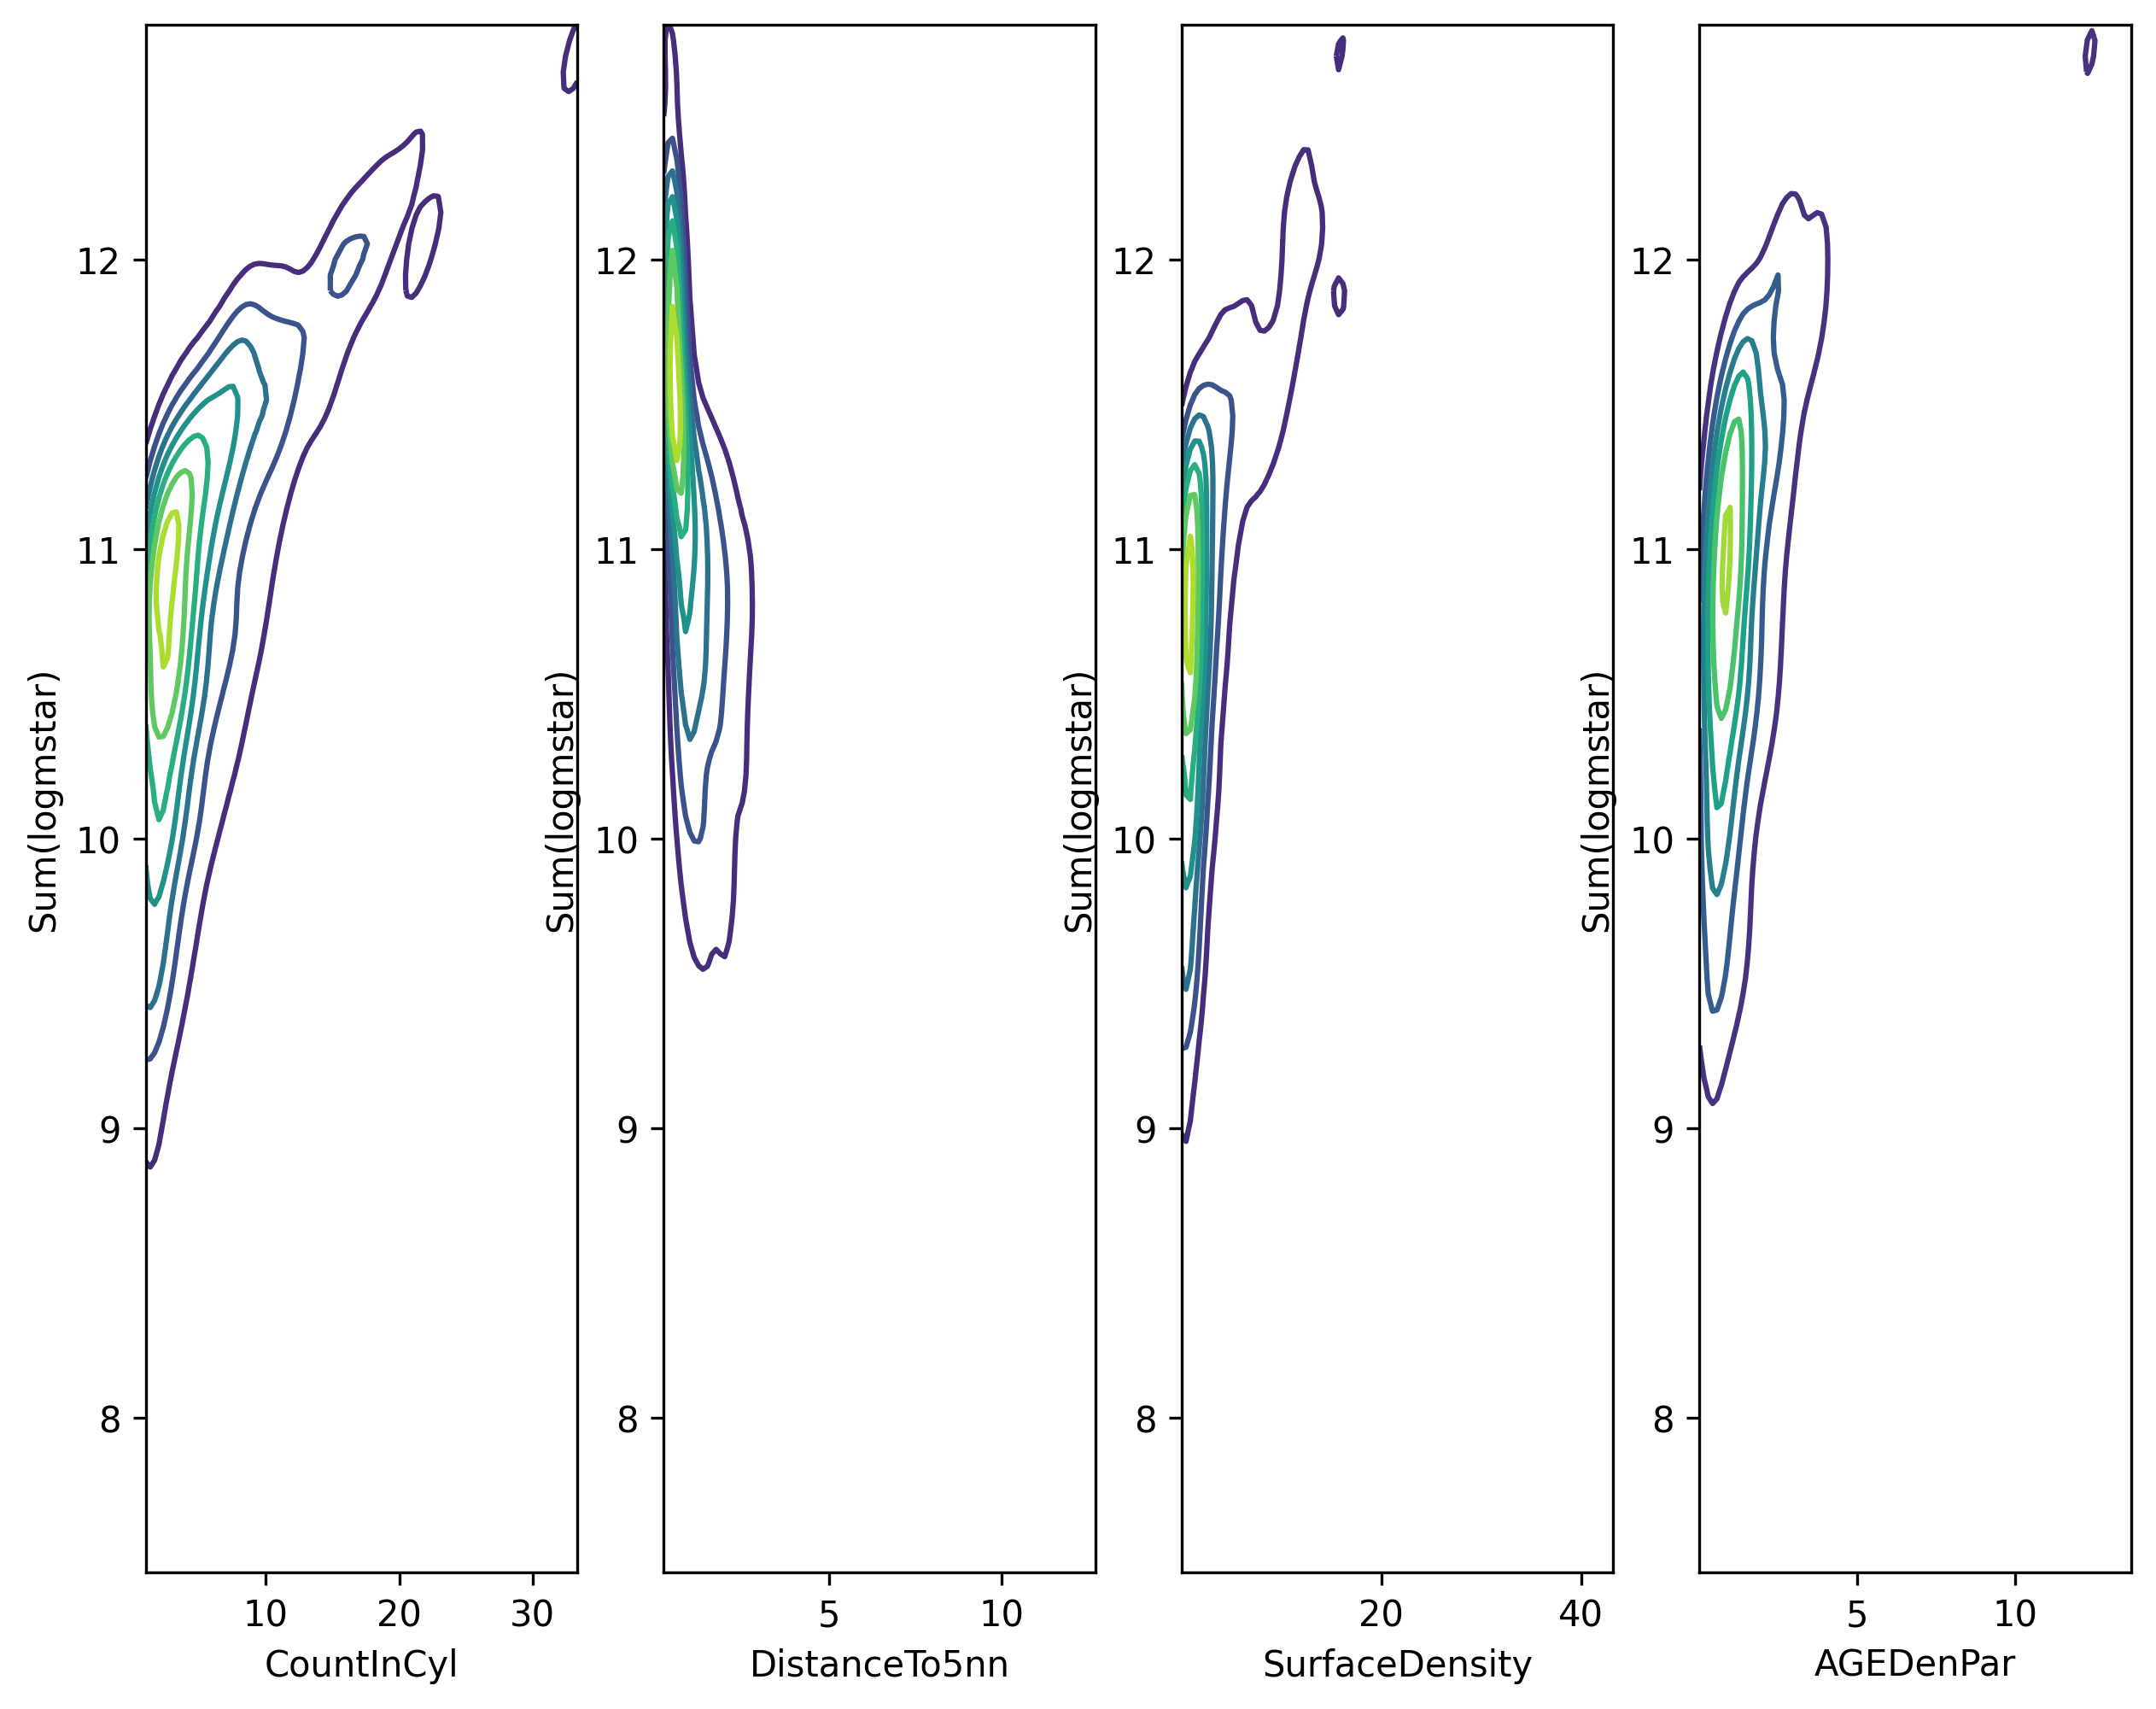

 yfield logmstar ymin 7.466585162996491 ymax 12.80964917094016

 xfield CountInCyl xmin 1.0 xmax 33.36618404065148
 xfield CountInCyl log values - xmin 0.004321373782642578 xmax 1.5234366815097105
Log Pearson Correlation x: CountInCyl y: logmstar Correlation : 0.679843265591432 T-Test : 0.0
Log Spearman Correlation x: CountInCyl y: logmstar Correlation : 0.6733592338018869 T-Test : 0.0
Log Linear Regresion x: CountInCyl y: logmstar slope : 1.3962169948390397 Intercept 9.93482173140277 Correlation 0.6733592338018876 Wald test 0.0 0.010032328457298078
 xfield DistanceTo5nn xmin 0.19200000166893005 xmax 12.737000465393066
 xfield DistanceTo5nn log values - xmin -0.6946486269652222 xmax 1.1054080016652714
Log Pearson Correlation x: DistanceTo5nn y: logmstar Correlation : -0.6470797922084123 T-Test : 0.0
Log Spearman Correlation x: DistanceTo5nn y: logmstar Correlation : -0.6079009761066481 T-Test : 0.0
Log Linear Regresion x: DistanceTo5nn y: logmstar slope : -1.6105720393461345 Intercept 

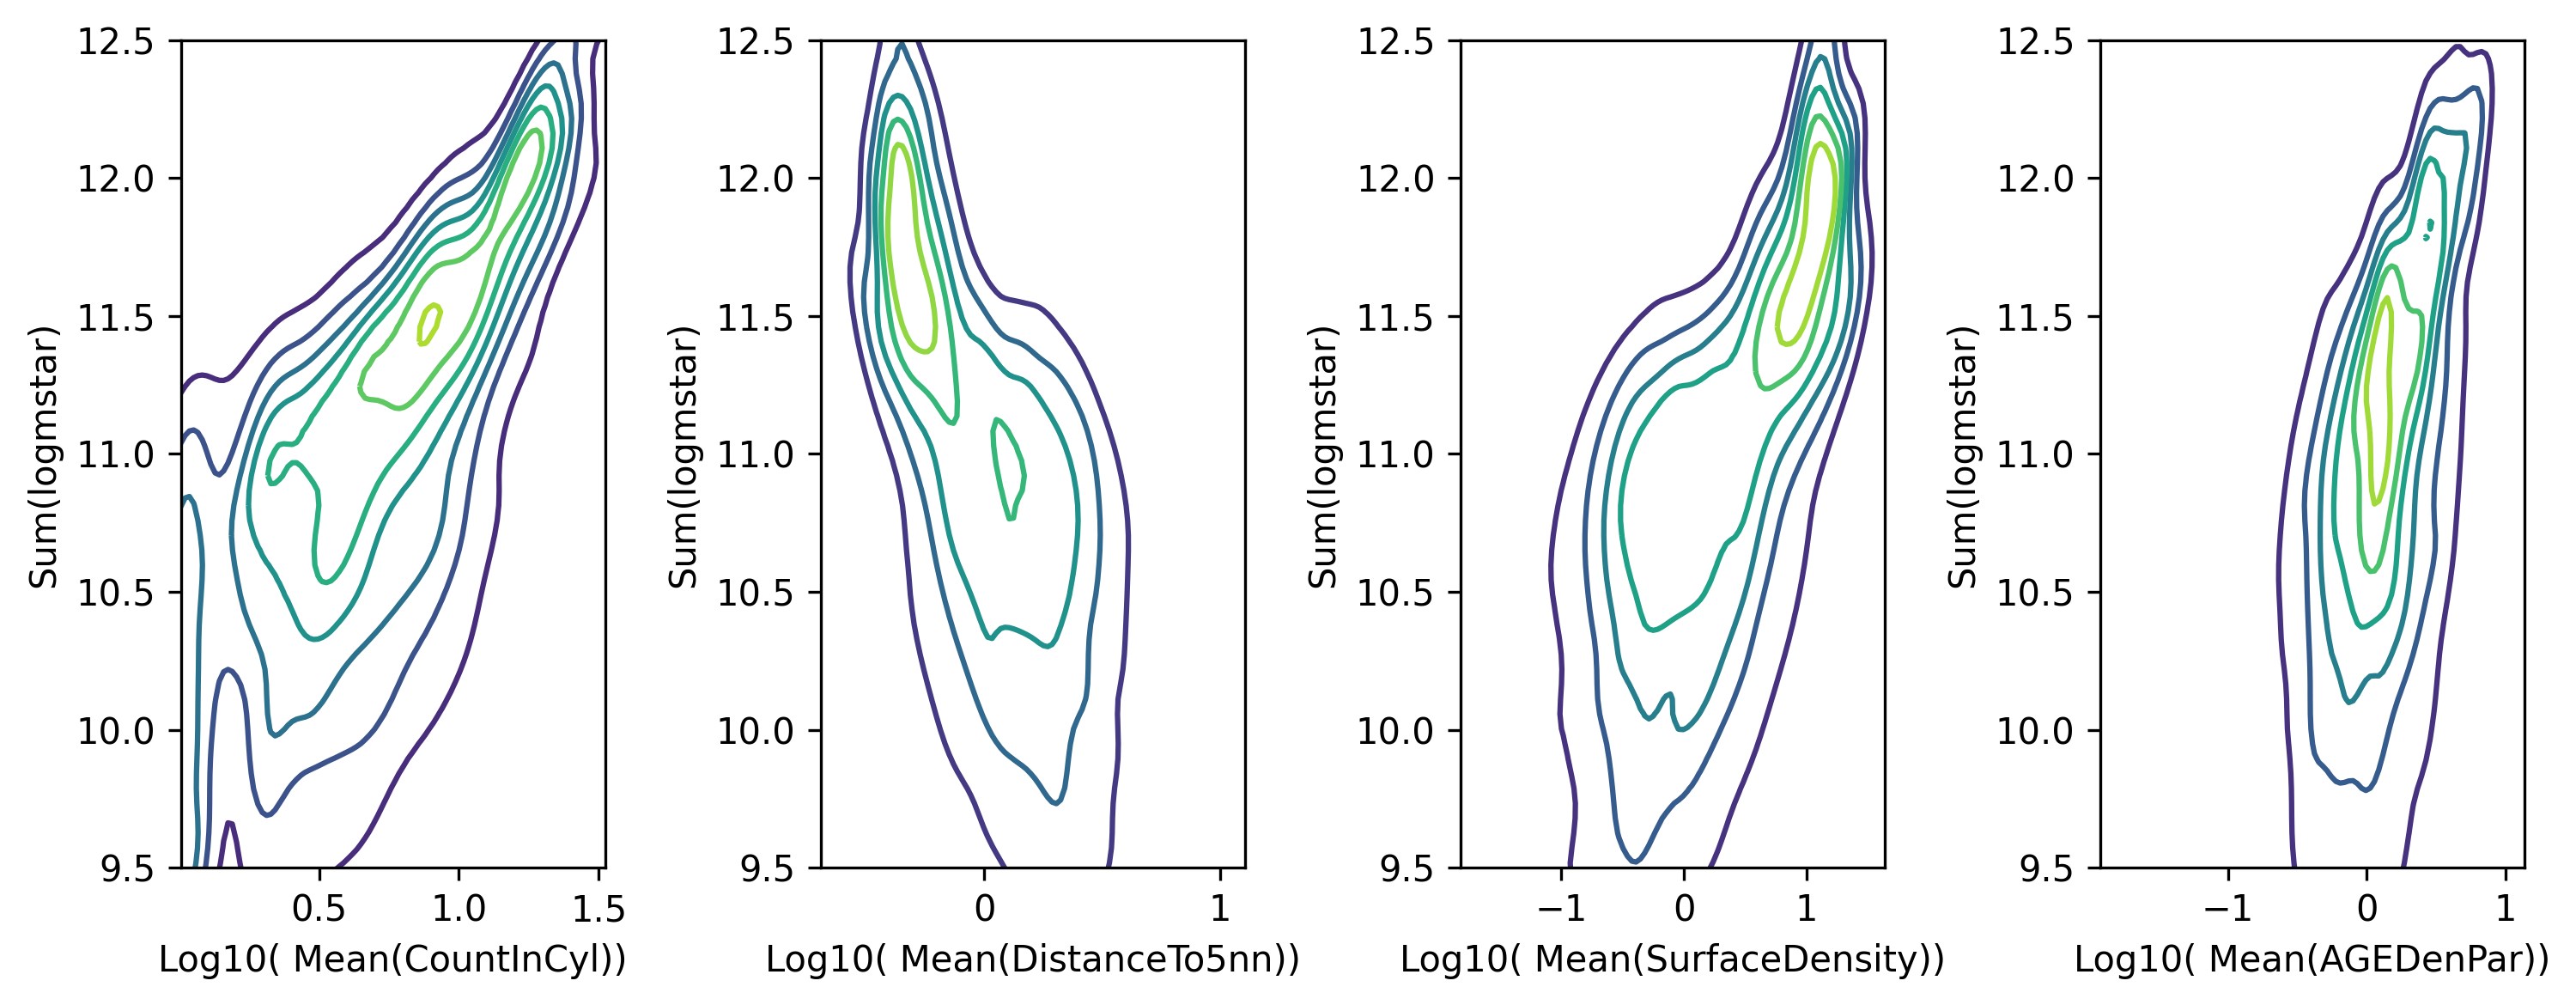

Joining Environment Classes 22965
 Type Voids size 1689
 Type Sheet size 6206
 Type Filament size 10342
 Type Knot size 4728


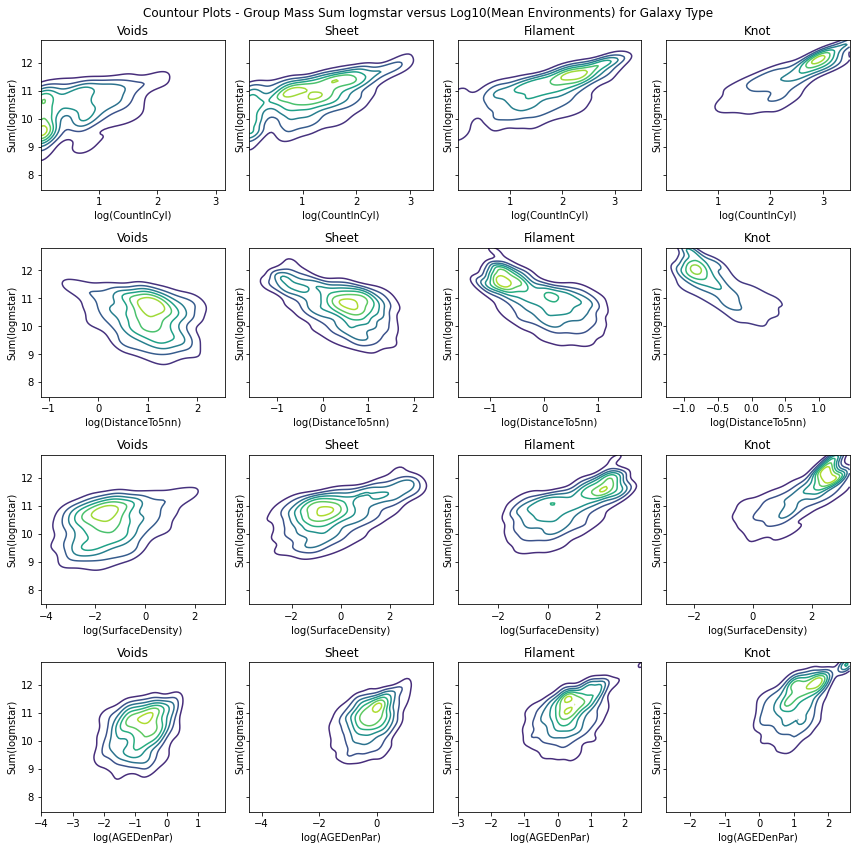

In [2]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]

StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
print(f"StellarMasses : {len(StellarMasses)}")

envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCyl'] > 0]

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
## Clean Data
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]

DataLocalGroup = join(GroupGal,StellarMasses,keys='CATAID',join_type='inner')
print(f"Join GroupGal & StellarMasses {len(DataLocalGroup)}")
print('GroupGal & StellarMasses')
print(DataLocalGroup.colnames)


DataLocalGroup = join(DataLocalGroup,envMeasures,keys='CATAID',join_type='inner')
print(f"Join GroupGal & EnvMeasures {len(DataLocalGroup)}")
#print('GroupGal & EnvMeasures')
print(DataLocalGroup.colnames)

# Sum logmstar over Local Group
DLG_Groups = DataLocalGroup.group_by('GroupID')

GroupLog = DLG_Groups['GroupID','logmstar'].groups.aggregate(lambda x: math.log10(np.sum(10**x)))
print("GroupLog")
print(GroupLog.colnames)

GroupEnv = DLG_Groups['GroupID','CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar'].groups.aggregate(np.mean)
print("GroupEnv")
print(GroupEnv.colnames)

FinalData1 = join(GroupGal,GroupLog,keys='GroupID',join_type='inner')
print("FinalData1")
print(FinalData1.colnames)

FinalData2 = join(FinalData1,GroupEnv,keys='GroupID',join_type='inner')
print("FinalData2")
print(FinalData2.colnames)

import math

alphaVal = .3
binCount = 100

RErange = FinalData2
#RErange = GroupData

fig = plt.figure(figsize=(10, 6), dpi=300)
#fig.suptitle('Plot - Redness versus Environments Galaxies  for Elliptical Galaxies')
                                                             
yfield = 'logmstar'

fig = plt.figure(figsize=(10, 6), dpi=300)
#fig.suptitle('Scatter - '+yfield+' versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel('Sum('+yfield+')')
    ax.set_xlabel(xfield)
    #ax.set_ylim([-5,7])
    x = RErange[xfield]
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
fig.tight_layout()
#fig.savefig('../../ChartsPlots/RedScatterEnvironments.png', dpi=300, bbox_inches='tight')                      
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
#fig.suptitle('Density Plots - Group '+yfield+' versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#xfields = ['GalData.CountInCyl','GalData.DistanceTo5nn','GalData.SurfaceDensity','GalData.AGEDenPar']      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for i,xfield in enumerate(xfields,1) :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel('Sum('+yfield+')')
    ax.set_xlabel(xfield)
    #ax.set_ylim([-6,7])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)
    #ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.spearmanr(x,y)
    print(f"Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
    
plt.show()                            
#fig.legend(loc="upper right")
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensityTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(10, 4), dpi=300)
#fig.suptitle('Density Plots - Group '+yfield+' versus Log(Environments Galaxies)  for Elliptical Galaxies')
#xfields = ['GalData.CountInCyl','GalData.DistanceTo5nn','GalData.SurfaceDensity','GalData.AGEDenPar']
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']     
y = RErange[yfield]
ymin = min(y)
ymax = max(y)
print(f" yfield {yfield} ymin {ymin} ymax {ymax}\n")
for i,xfield in enumerate(xfields,1) :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} xmin {xmin} xmax {xmax}")
    x = np.log10(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} log values - xmin {xmin} xmax {xmax}")
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel('Sum('+yfield+')')
    ax.set_xlabel('Log10( Mean('+xfield+'))')
    ax.set_ylim([9.5,12.5])              
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)  
    #ax.plot(x, y, 'k.', markersize=2)
    
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.spearmanr(x,y)
    print(f"Log Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Log Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.pearsonr(x,y)
    print(f"Log Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
#fig.legend(loc="upper right")
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensity-Sum-logmstar-Log-Mean-Environments.png', dpi=300, bbox_inches='tight')
plt.show()

#fig = plt.figure(figsize=(10, 8), dpi=300)
fig, axes = plt.subplots(4,4,figsize=(12, 12), sharey=True) 
fig.suptitle('Countour Plots - Group Mass Sum logmstar versus Log10(Mean Environments) for Galaxy Type')

RErange = join(RErange,envClass,keys='CATAID',join_type='inner')
print('Joining Environment Classes '+str(len(RErange)))

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 0
j = 0

for j, gt in enumerate(types):
    subrange = RErange[RErange['GeoS4'] == gt[0]]
    print(f" Type {gt[1]} size {len(subrange)}")
    y = subrange[yfield]
    for i, xfield in enumerate(xfields) :
        x = np.log(subrange[xfield]+0.01)
        xmin = min(x)
        xmax = max(x)
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        #ax = fig.add_subplot(1, len(xfields), i)
        axes[i,j].set_title(gt[1])
        axes[i,j].set_ylabel('Sum('+yfield+')')
        axes[i,j].set_xlabel('log('+xfield+')')
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
        #axes[i,j].imshow(np.rot90(Z), cmap='PuBu')
        axes[i,j].contour(X, Y, Z)
        #axes[i,j].plot(x, y, 'k.', markersize=2)
        #ax.set_xlim([xmin, xmax])
        #ax.set_ylim([ymin, ymax])                           
        #fig.legend(loc="upper right")
        #plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensity_Sum_'+yfield+'_LogEnvironmentsGalaxyType.png', dpi=300, bbox_inches='tight')
plt.show()




    



